# 일원 분산 분석(One-way ANOVA)
일원 분산 분석(One-way ANOVA)은 세 개 이상의 독립된 그룹 간의 평균 차이가 통계적으로 유의미한지를 검정하는 방법입니다. 이 방법은 한 개의 범주형 독립변수(요인)에 따른 여러 집단의 종속변수 평균을 비교할 때 사용됩니다.

* 정규성: 각 그룹의 데이터가 정규분포를 따른다고 가정합니다.
* 등분산성 (Homogeneity of Variance): 각 그룹의 분산이 동일하다고 가정합니다.
* 독립성: 각 관측치는 서로 독립적이어야 합니다.

In [19]:
# 4종류의 비료를 사용한 식물의 성장에 대한 실험
# 식물 40개를 무작위로 10개씩 나누고, 화학 비료 A,B,C,D 를 일정 기간 사용한 후 성장량을 측정
# 성장의 차이가 있는지 유의수준 0.05 하에서 검정.

import pandas as pd

# 귀무가설: 네 가지 비료는 효과가 동일하다.
# 대립가설: 비료의 효과에는 차이가 있다. (적어도 두 가지 비료의 효과에는 차이가 있다.)

df = pd.DataFrame({
    'A': [10.5, 11.3, 10.8, 9.6, 11.1, 10.2, 10.9, 11.4, 10.5, 10.3],
    'B': [11.9, 12.4, 12.1, 13.2, 12.5, 11.8, 12.2, 12.9, 12.4, 12.3],
    'C': [11.2, 11.7, 11.6, 10.9, 11.3, 11.1, 10.8, 11.5, 11.4, 11.0],
    'D': [9.8, 9.4, 9.1, 9.5, 9.6, 9.9, 9.2, 9.7, 9.3, 9.4]
})

df.head()

,A,B,C,D
0,10.5,11.9,11.2,9.8
1,11.3,12.4,11.7,9.4
2,10.8,12.1,11.6,9.1
3,9.6,13.2,10.9,9.5
4,11.1,12.5,11.3,9.6


In [20]:
# 정규성 만족하는지 확인 - shapiro 

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import koreanize_matplotlib

print(stats.shapiro(df['A']))
print(stats.shapiro(df['B']))
print(stats.shapiro(df['C']))
print(stats.shapiro(df['D']))

# p > 0.05 ; 네 개 다 정규성 만족. 

ShapiroResult(statistic=0.9649054066073813, pvalue=0.8400161543468654)
ShapiroResult(statistic=0.9468040874196029, pvalue=0.6308700692815115)
ShapiroResult(statistic=0.9701646110856055, pvalue=0.892367306190296)
ShapiroResult(statistic=0.9752339025839644, pvalue=0.9346854448707653)


In [21]:
# 분산이 동일한지 확인 - levene

stats.levene(df['A'], df['B'], df['C'], df['D'])

# p>= > 0.05 ; 분산도 동일하다고 추론 가능

LeveneResult(statistic=1.9355354288758708, pvalue=0.14127835331346628)

In [22]:
## 차이가 있는지 확인하는 방법 (일원분산분석) 1) - f_oneway

# H0: 네 개 중 어떤 것도 차이가 없다 (ㅁ=ㅁ=ㅁ=ㅁ)
# H1: 네 개 중 적어도 두 개는 유의미한 차이가 있다 

stats.f_oneway(df['A'], df['B'], df['C'], df['D'])

# p < 0.05 ; H0기각.  네 개 중 적어도 두 개는 유의미한 차이가 있다 
# F통계량 = 89 ; 그룹 간에 평균 차이가 그룹 내 변동에 비해 89배 정도 크다.

F_onewayResult(statistic=89.12613851177174, pvalue=1.001838152252373e-16)

In [10]:
## 차이가 있는지 확인하는 방법 (일원분산분석) 2) -  ols, stats.anova_lm

# 같은 열로 쭉 내려서 적어줌 - melt 

df2 = pd.melt(df)

# 성장 차이를 보고 싶다 = variable을 가지고 value를 보고싶다 = value를 종속변수(y)로.
# 범주형 변수일 때는 앞에 C붙여줄것 

from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('value ~ C(variable)', data = df2).fit()

sm.stats.anova_lm(model)

# p < 0.05 ; H0기각. 네 개 중 적어도 두 개의 분산에 유의미한 차이가 있다?

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),3.0,43.21875,14.406250,89.126139,1.001838e-16
Residual,36.0,5.81900,0.161639,NaN,NaN


In [13]:
# 사후 분석(일원 분산 분석이 유의미한 경우에) - pairwise_tukeyhsd
# 어떤 비료가 유의미한지 확인 

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

report = pairwise_tukeyhsd(endog = df2['value'],  groups = df2['variable'], alpha = 0.05)
print(report)

# 각각 두집단씩 비교.. 모든 경우에 대해 해줌 
# 다 p < 0.05 ; 효과가 있다?

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     1.71    0.0  1.2258  2.1942   True
     A      C     0.59 0.0118  0.1058  1.0742   True
     A      D    -1.17    0.0 -1.6542 -0.6858   True
     B      C    -1.12    0.0 -1.6042 -0.6358   True
     B      D    -2.88    0.0 -3.3642 -2.3958   True
     C      D    -1.76    0.0 -2.2442 -1.2758   True
----------------------------------------------------


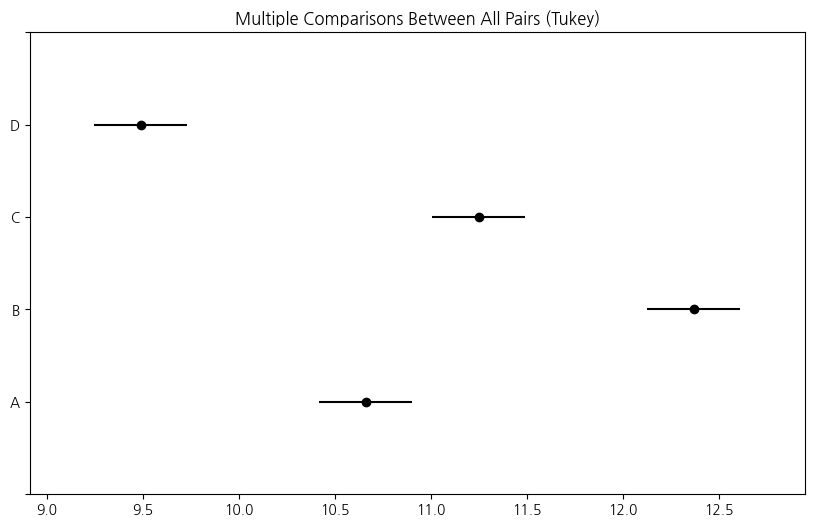

In [15]:
# 시각화
report.plot_simultaneous()
plt.show()

# 네 개 집단의 평균의 차 확인 가능 

* 만약 정규성을 따르지 않으면?

In [14]:
# 크루스칼 윌리스 검정 // 세 개 이상의 독립된 집단의 >>중앙값<< 차이가 통계적으로 유의미한지 
stats.kruskal(df['A'], df['B'], df['C'], df['D'])

KruskalResult(statistic=33.91729415078395, pvalue=2.0624565034628142e-07)

In [ ]:
# 만약 분산이 동일하지 않으면  -->  그냥 검정을 하지말 것.

## 연습문제
한 연구자가 세 가지 다른 교육 방법(교육 방법 A, 교육 방법 B, 교육 방법 C)이 학생들의 시험 점수에 미치는 영향을 알아보고자 하였습니다. 각 교육 방법을 적용받은 학생들의 시험 점수가 아래와 같이 주어졌다고 가정합니다.

In [23]:
A1 = [70, 72, 68, 74, 69, 73, 70, 71, 72, 70]
B1 = [75, 78, 74, 77, 76, 80, 79, 75, 78, 77]
C1 = [82, 85, 80, 83, 81, 84, 86, 82, 83, 85]

In [24]:
#df = pd.DataFrame({
#    'A' : [70, 72, 68, 74, 69, 73, 70, 71, 72, 70],
#    'B' : [75, 78, 74, 77, 76, 80, 79, 75, 78, 77],
#    'C' : [82, 85, 80, 83, 81, 84, 86, 82, 83, 85]
#})

df = pd.DataFrame({'A':A1,'B':B1,'C':C1})

df.head()

print(stats.shapiro(df['A']))
print(stats.shapiro(df['B']))
print(stats.shapiro(df['C']))

# p > 0.05 ; 세 개 다 정규성 만족. 

ShapiroResult(statistic=0.9692121326757147, pvalue=0.8834456534794826)
ShapiroResult(statistic=0.9691888544165497, pvalue=0.8832241960495848)
ShapiroResult(statistic=0.9691888544165495, pvalue=0.8832241960495825)


In [25]:
stats.levene(df['A'], df['B'], df['C'])

# p > 0.05 ; 세 개의 분산 동일 

LeveneResult(statistic=0.0, pvalue=1.0)

In [26]:
## 일원분산분석 1) -  f_oneway

# H0: 세 개 중 어떤 것도 차이가 없다 (ㅁ=ㅁ=ㅁ=ㅁ)
# H1: 세 개 중 적어도 두 개는 유의미한 차이가 있다 

stats.f_oneway(df['A'], df['B'], df['C'])

# p < 0.05 ; H0기각.   즉 세 개 중 적어도 두 개는 유의미한 차이가 있다 
# statistic = 103 ; 그룹 간에 평균 차이가 그룹 내 변동에 비해 103배 정도 크다.

F_onewayResult(statistic=103.90486039296802, pvalue=2.083261762272435e-13)

In [27]:
# 같은 열로 쭉 내려서 적어줌 - melt 

df2 = pd.melt(df)
df2

,variable,value
0,A,70
1,A,72
2,A,68
3,A,74
4,A,69
5,A,73
6,A,70
7,A,71
8,A,72
9,A,70


In [28]:
## 일원분산분석 2) -  stats.anova_lm

# 교육법에 따른 점수의 차이를 보고 싶다 = variable을 가지고 value를 보고싶다 = value를 종속변수(y)로.
# 범주형 변수일 때는 앞에 C붙여줄것 

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('value ~ C(variable)', data = df2).fit()

sm.stats.anova_lm(model)

# p < 0.05 ; H0기각.  네 개 중 적어도 두 개의 분산에 유의미한 차이가 있다?

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),2.0,744.266667,372.133333,103.90486,2.083262e-13
Residual,27.0,96.700000,3.581481,NaN,NaN


In [29]:
# 사후 분석(일원 분산 분석이 유의미한 경우에) - pairwise_tukeyhsd
# 어떤 교육법이 유의미한지 확인 

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

report = pairwise_tukeyhsd(endog = df2['value'],  groups = df2['variable'], alpha = 0.05)
print(report)

# 각각 두집단씩 비교.. 모든 경우에 대해 해줌 
# 다 p < 0.05 ; 모든 교육방법이 효과가 있다

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B      6.0   0.0  3.9016  8.0984   True
     A      C     12.2   0.0 10.1016 14.2984   True
     B      C      6.2   0.0  4.1016  8.2984   True
---------------------------------------------------


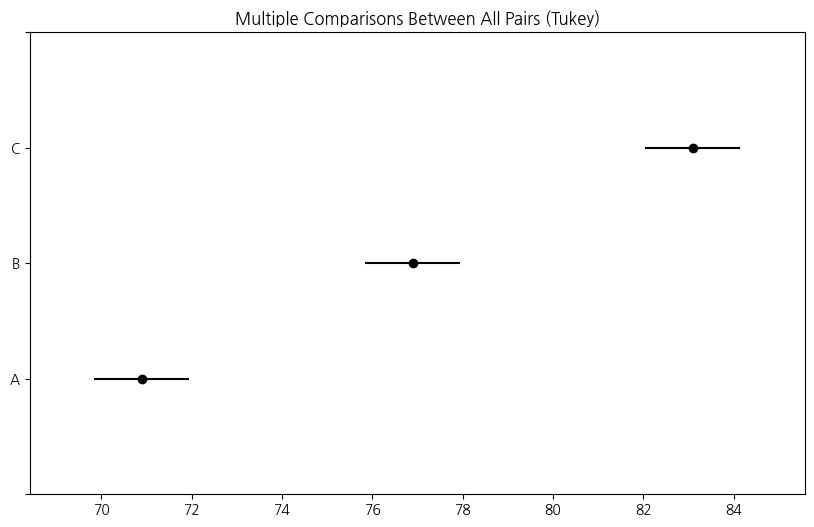

In [17]:
# 시각화
report.plot_simultaneous()
plt.show()

# 세 개 집단의 평균의 차 확인 가능 